# Backpropagation Lab





In [1]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

## 1 Avoiding Overfit: Early Stopping and Loss Regularization

### 1.1 (10%) No overfit avoidance
Train the sklearn [MLP classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier) on the [Iris Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/iris.arff).  Use 3 output nodes (1 per class). Expanding the one output variable into 3 is called one-hot encoding or dummy variable encoding. There are lots of ways to implement this including the Pandas get_dummies method. This experiment is set up to run a little longer to better see the effects of overfit.  Be patient as there are lots of hidden nodes and a high max iterations setting.

Use default parameters except for the following:
- hidden_layer_sizes = [64] - One hidden layer with 64 hidden nodes
- activation = 'logistic'
- solver = 'sgd'
- alpha = 0
- batch_size = 1
- learning_rate_init = 0.01
- shuffle = True
- momentum = 0
- n_iter_no_change = 50
- max_iterations = 10000

Use a random 80/20 split of the data.  Run it a few times with different random training/test splits and give average values for
- Number of iterations until convergence
- Training set accuracy
- Test set accuracy
For one run observe the softmax probabilities on the test set using clf.predict_proba

In [2]:
#Iris with no regularization
iris = load_iris()
data = iris.data
target = iris.target

y = pd.get_dummies(target).values

iterations = []
training_accuracy = []
test_accuracy = []

for _ in range(5):
  X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

  mlp = MLPClassifier(hidden_layer_sizes=64, activation='logistic', solver='sgd', alpha=0, batch_size=1, learning_rate_init=0.01, shuffle=True, momentum=0, n_iter_no_change=50, max_iter=10000).fit(X_train, y_train)

  iterations.append(mlp.n_iter_)
  training_accuracy.append(mlp.score(X_train, y_train))
  test_accuracy.append(mlp.score(X_test, y_test))

print(f'Softmax Probabilities: {mlp.predict_proba(X_test)}')
print(f'Iterations until Convergence: {np.mean(iterations)}')
print(f'Training Set Accuracy: {np.mean(training_accuracy)}')
print(f'Test Set Accuracy: {np.mean(test_accuracy)}')

Softmax Probabilities: [[1.92606069e-04 9.52540179e-01 2.32685747e-02]
 [9.99296852e-01 2.59520982e-03 1.05561168e-11]
 [3.29758821e-07 7.13297749e-04 9.99882169e-01]
 [1.49553764e-04 9.10331104e-01 4.02844429e-02]
 [2.30689727e-04 9.71091067e-01 1.64217007e-02]
 [9.99020157e-01 3.66624169e-03 1.63502738e-11]
 [4.59905215e-03 9.97078952e-01 7.11160511e-05]
 [8.86216537e-06 9.31574711e-02 9.28437697e-01]
 [3.04431042e-05 4.85019617e-01 5.05903339e-01]
 [1.67367274e-03 9.95921056e-01 3.89588311e-04]
 [1.55593344e-05 2.03995660e-01 8.02548820e-01]
 [9.98831727e-01 6.12234541e-03 1.81980930e-11]
 [9.99540121e-01 1.92684194e-03 6.00538062e-12]
 [9.98772351e-01 6.46038215e-03 1.91852883e-11]
 [9.99396897e-01 1.97841110e-03 9.00552655e-12]
 [2.62265325e-04 9.62738315e-01 1.33957125e-02]
 [1.04641677e-06 3.14844810e-03 9.98874289e-01]
 [9.90196921e-04 9.92617818e-01 1.04137204e-03]
 [1.34736163e-04 8.94742188e-01 4.82073510e-02]
 [1.05321159e-06 3.20147839e-03 9.98856392e-01]
 [9.98238945e-01 

#### Discussion
In the markdown cell below, write about your experience training the MLP classifier. Things to cover in your discussion: How long did it take? What was your accuracy on the training set? What was your accuracy on the testing set? Do you see any evidence of overfitting? If so, what could be done to reduce the effects of overfitting?

It took about 30 seconds to a minute to run the MLP classifier 5 times. The accuracy for both the training set and testing set ranged each time I ran it, but the ultimate time the training set ended up with 97% accuracy, and the testing set ended up wtih 98% accuracy. As I was running the tests, every so often, one of the sets would come back with 100% accuracy. To me this was a sign of overfitting, because the MLP would be so trained on the data, that it seemed to 'memorize' it enough to have 100% accuracy. A way to reduce this overfitting, would be to have earlier stopping points once the error gets above a certain threshold. We could also reduce the number of hidden nodes. Even with the big dataset, having 64 hidden nodes may be too many. By decreasing the number of hidden nodes it would help the algorithm to not overfit the data. However, with this strategy, we have to be mindful to not underfit the data by finding a good number of hidden nodes to balance out the accuracy of the model.

### 1.2 (10%) Early Stopping (Validation Set)

- Do the same as above but this time with early stopping
- Use a validation set taken from the training set for your stopping criteria. Using 10-15% of the training set for a validation set is common. You do this simply by setting the MLPClassifier early_stopping, validation_fraction, and n_iter_no_change parameters.
- Run it a few times with different training/test splits and give average values for
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best validation score (MLPClassifer attribute best_validation_score_)
- For one run create a graph with validation set accuracy (*y*-axis) vs epochs (*x*-axis). Hint: MLPClassifer attribute validation_scores_

Note: Due to the simplicity of and lack of noise in the iris data set you will not see the accuracy improvements that early stopping or loss regularization can give for more complex noisy datasets.  In particular, early stopping will have lower than expected results because with a very small VS taken from a very small training set there is less data to train on and more variance with the VS score.  Thus, you will probably get lower accuracies for VS than normal training for this less typical case.  But at least you will get practice on using early stopping and loss regularization for future data sets.

In [3]:
#Iris with early stopping and validation scores graph
iris = load_iris()
data = iris.data
target = iris.target

y = pd.get_dummies(target).values

iterations = []
training_accuracy = []
test_accuracy = []
validation_score = []

for _ in range(5):
  X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

  mlp = MLPClassifier(hidden_layer_sizes=64, activation='logistic', solver='sgd', alpha=0, batch_size=1,
                      learning_rate_init=0.01, shuffle=True, momentum=0, early_stopping=True, validation_fraction=0.15,
                      n_iter_no_change=50, max_iter=10000)
  mlp.fit(X_train, y_train)

  iterations.append(mlp.n_iter_)
  training_accuracy.append(mlp.score(X_train, y_train))
  test_accuracy.append(mlp.score(X_test, y_test))
  validation_score.append(mlp.best_validation_score_)

print(mlp.validation_scores_)
print(f'Iterations until Convergence: {np.mean(iterations)}')
print(f'Training Set Accuracy: {np.mean(training_accuracy)}')
print(f'Test Set Accuracy: {np.mean(test_accuracy)}')
print(f'Validation Score: {np.mean(validation_score)}')

[0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.7222222222222222, 0.5555555555555556, 0.6111111111111112, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.6666666666666666, 0.7222222222222222, 0.6111111111111112, 0.6111111111111112, 0.6666666666666666, 0.5555555555555556, 0.6111111111111112, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.6111111111111112, 0.7222222222222222, 0.6666666666666666, 0.6666666666666666, 0.7222222222222222, 0.7222222222222222, 0.6111111111111112, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7777777777777778, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7777777777777778, 0.7777777777777778,

#### Discussion
Report on the average number of iterations until convergence. What is the effect of the use of the validation set and early stopping on training set accuracy and testing set accuracy? What do you attribute the performance change to? What do you see in the validation scores graph?

When I ran the normal iterations of the MLP without the early stop, it always averaged out to about 300 iterations, when with the early stop it averaged out to about 100-130 iterations each time it ran. While the accuracy of the early stop trial did decrease slightly when compared to the normal trails, the decrease in iterations until convergence didn't have a substantial effect on the overall accuracy of the program. The training set accuracy did decrease by a few points, but the testing set accuracy remained similar to the original trials. This is probably because some of the data was taken for a validation set, so not all of the training data was being used to train the algorithm. The validation scores graph starts with 0% accuracy, and then approaches 100% accuracy as the algorithm converges. It is interesting to note, that the algorithm didn't stop when the validation set hit 100%, but kept going until the validation set had achieved 100% accuracy multiple times, and the scores weren't improving by much.

### 1.3 (10%) Loss Regularization

- Do the same as in 1.1 but his time with loss regularization (Do not do early stopping)
- Run it with different L2 regularization parameter values (alpha).  The default for alpha is .0001.  Try other values such as .1, .01, .001, .00001, etc. Make a table with each row including:
    - The regularization parameter value
    - Number of iterations until convergence
    - Training set accuracy
    - Test set accuracy
    - Best loss value (MLPClassifer attribute best_loss_)
- Which regularization value gave you the best results?
- For your best regularization value do one run and create a graph with loss (*y*-axis) vs epochs (*x*-axis) for the training set (Hint: MLPClassifer attribute loss_curve_)

          Iterations until Convergence  Training Set Accuracy  \
0.000000                           322               0.925000   
0.100000                            89               0.566667   
0.010000                           302               0.950000   
0.001000                           220               0.966667   
0.000100                           272               0.966667   
0.000010                           291               0.975000   
0.000001                           290               0.958333   

          Test Set Accuracy  Best Loss Value  
0.000000           0.866667         0.123715  
0.100000           0.633333         1.650008  
0.010000           0.900000         0.780075  
0.001000           0.966667         0.261033  
0.000100           0.966667         0.155746  
0.000010           0.966667         0.112917  
0.000001           0.900000         0.133014  


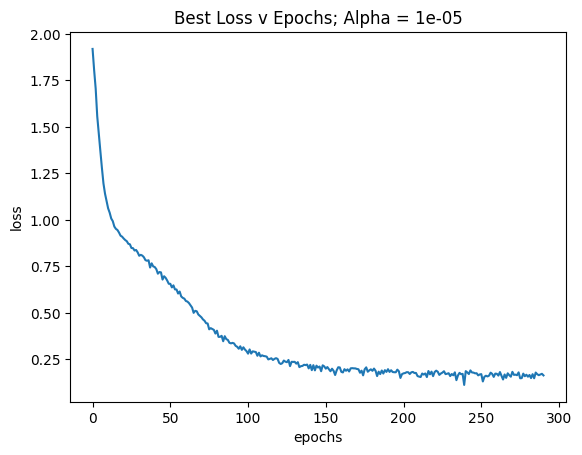

In [4]:
#Iris with Loss Regularization
from collections import defaultdict

iris = load_iris()
data = iris.data
target = iris.target

y = pd.get_dummies(target).values

alpha_values = [0, .1, .01, .001, .0001, .00001, .000001]

results = defaultdict(list)

best_accuracy = 0
best_mlp = None
best_alpha = 0
best_loss = 1

for i in alpha_values:
  X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

  mlp = MLPClassifier(hidden_layer_sizes=64, activation='logistic', solver='sgd', alpha=i, batch_size=1,
                      learning_rate_init=0.01, shuffle=True, momentum=0, n_iter_no_change=50, max_iter=10000)
  mlp.fit(X_train, y_train)

  results[i].append(mlp.n_iter_)
  results[i].append(mlp.score(X_train, y_train))
  test_Acc = mlp.score(X_test, y_test)
  results[i].append(test_Acc)
  loss = mlp.best_loss_
  results[i].append(loss)

  if test_Acc >= best_accuracy and loss < best_loss:
    best_accuracy = test_Acc
    best_mlp = mlp
    best_alpha = i
    best_loss = loss

df = pd.DataFrame.from_dict(results, orient="index")
df.columns = ["Iterations until Convergence", "Training Set Accuracy", "Test Set Accuracy", "Best Loss Value"]
print(df)

plt.plot(best_mlp.loss_curve_)
plt.title(f"Best Loss v Epochs; Alpha = {best_alpha}")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

#### Discussion
Write about which regularization method gave you the best results and why you think that happened. Also compare: no regularization, early stopping, and L2 loss regularization.

The best regularization method was always one of the trials with one of the smallest alpha values. The smaller the value got the stronger the L2 regularization term become, causing the loss to decrease. This then caused the lower regularization terms to have the better accuracy values. The training set accuracy stayed about the same over each trial, but the text accuracy increased when using the L2 loss regularization. This suggests that the alpha value has a greater influence on the accuracy of the algorithm than the early stopping parameter.

## 2 Hyperparameters
In this section we use the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff) to consider the hyperparameters of learning rate, number of hidden nodes, and momentum.

### 2.1 (10%) Vowel Dataset Questions
- Give the baseline accuracies for the Iris and Vowel datasets. Baseline accuracy is what you would get if the model just outputs the majority class of the data set (i.e. the output value which occurs most often). These two data sets are not great examples for this as they have an equal amount of each class, which is not typical.
- Discuss why the vowel data set will probably have lower accuracy than Iris.
- Consider which of the vowel dataset's input features you should not use in training and discuss why.

Since the two datasets have equal amounts of each class the baseline accuracy of the Iris data set is 33.3% because there are 3 classes. The Vowel dataset has a baseline accuracy of about 9.1% because there are 11 classes. The vowel set will have a lower accuracy than the Iris because there are more classes that it has to train for. Therefore, it's base accuracy cis based on the number of classes it has, and since it has more than the Iris dataset, it has a lower base accuracy. The input features that seem irrelevant are the speaker number, the sex of the speaker and Train or Test value. These features do not carry meaningful patterns when looking at the vowel data, but instead are participant identifiers that can be ignored when training the model.

### 2.2 (10%) Learning Rate
Load the [Vowel Dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/vowel.arff). Drop any features which you explained above as being inappropriate for training.

Hints: Consider the Pandas drop method for dropping columns. When you want to transform features in your data set there are lots of approaches. You could edit the arff file directly, or make the transforms in your code.  The Pandas replace method is nice for that. For example, if you wanted to change the vowel data set gender feature in a Pandas dataframe to 0/1 you could do the following:

vowel_df['Sex'] = vowel_df['Sex'].str.decode('utf-8')   //Changes the byte code data into a normal string, b'Male' becomes "Male"\
vowel_df = vowel_df.replace('Male', 0)\
vowel_df = vowel_df.replace('Female', 1)

- Use one layer of hidden nodes with the number of hidden nodes being twice the number of inputs.
- Use a random 75/25 split of the data for the training/test set.
- Do not use early stopping.
- Try at least 5 different learning rates (LR) from very small (e.g. .001) to pretty big (e.g. 10). Each LR will require a different number of epochs to learn. LR effects both accuracy and time required for learning.
- Create a table which includes a row for each LR.  Your table columns should be LR, # epochs to learn the model, final training set accuracy and final test set accuracy.  As learning rates get smaller, it usually takes more epochs to learn. If your model is stopping learning too soon (converging) by hitting max_iterations (in this case and in experiments below), then you need to increase your max_iterations parameter in order to give your model more learning time.  To keep things faster, you don't need to increase max_iter past 1000 if you don't want to, but point out when more iterations may have given improvement.

In real testing one averages the results of multiple trials per LR (and other parameters) with different intitial conditions (training/test split, initial weights, etc.). That gives more accurate results but is not required for this lab.

In [5]:
# Train with different learning rates
from scipy.io import arff

data, meta = arff.loadarff("vowel_dataset.arff")
df = pd.DataFrame(data)
df = df.map(lambda x: x.decode("utf-8") if isinstance(x, bytes) else x)
df = df.drop(columns=["Train or Test", "Speaker Number", "Sex"])
target_col = "Class"
y = pd.get_dummies(df[target_col]).values
X = df.drop(columns=[target_col]).values

lr_values = [0.0001, .001, .01, .1, 1.0, 10.0]

results = defaultdict(list)

for i in lr_values:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  mlp = MLPClassifier(hidden_layer_sizes=22, activation='logistic', solver='sgd', alpha=0, batch_size=1,
                      learning_rate_init=i, shuffle=True, momentum=0, n_iter_no_change=50, max_iter=1000)
  mlp.fit(X_train, y_train)

  results[i].append(mlp.n_iter_)
  results[i].append(mlp.score(X_train, y_train))
  results[i].append(mlp.score(X_test, y_test))


df2 = pd.DataFrame.from_dict(results, orient="index")
df2.columns = ["Iterations until Convergence", "Training Set Accuracy", "Test Set Accuracy"]
print(df2)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


         Iterations until Convergence  Training Set Accuracy  \
0.0001                           1000               0.041779   
0.0010                           1000               0.510782   
0.0100                           1000               0.920485   
0.1000                            770               0.962264   
1.0000                            262               0.500000   
10.0000                           119               0.101078   

         Test Set Accuracy  
0.0001            0.048387  
0.0010            0.383065  
0.0100            0.758065  
0.1000            0.790323  
1.0000            0.423387  
10.0000           0.060484  


#### Discussion
Discuss your table and the effect of different learning rates on both training time and accuracy

While the higher learning rates caused the model to converge in a lot less epochs, the accuracy of the model decreased substancially. I was really surprized by how quickly the accuracy declined once the model was given higher learning rates. Having a smaller learning rate did cause the model to run a lot slower then having a larger learning rate. The smaller learning rates did hit the maximum number of iterations so having more iterations for those values would have improved the accuracy of these tests. I thought it was interesting that the accuracy peaked with a learning rate of .1 as opposed to the default value of 0.01. While the test accuracy stayed the same, the training accuracy found it's peak with this value, and it had substantially less epochs that the default learning rate value. So this value not only maximizes accuracy, but also helps to decrease the time of the model.

### 2.3 (10%) Number of Hidden Nodes

Using the best LR you discovered, experiment with different numbers of hidden nodes.

- Start with 1 hidden node, then 2, and then double them for each test until you get no more improvement in accuracy.
- Create a table just like above, except with # of hidden nodes rather than LR.

In general, whenever you are testing a parameter such as # of hidden nodes, keep testing values until no more improvement is found. For example, if 20 hidden nodes did better than 10, you would not stop at 20, but would try 40, etc., until you no longer got improvement.

In [6]:
# Train with different numbers of hidden nodes
from scipy.io import arff

data, meta = arff.loadarff("vowel_dataset.arff")
df = pd.DataFrame(data)
df = df.map(lambda x: x.decode("utf-8") if isinstance(x, bytes) else x)
df = df.drop(columns=["Train or Test", "Speaker Number", "Sex"])
target_col = "Class"
y = pd.get_dummies(df[target_col]).values
X = df.drop(columns=[target_col]).values

hidden_nodes = [1, 2, 4, 8, 16, 32, 64, 128]

results = defaultdict(list)

for i in hidden_nodes:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  mlp = MLPClassifier(hidden_layer_sizes=i, activation='logistic', solver='sgd', alpha=0, batch_size=1,
                      learning_rate_init=0.1, shuffle=True, momentum=0, n_iter_no_change=50, max_iter=1000)
  mlp.fit(X_train, y_train)

  results[i].append(mlp.n_iter_)
  results[i].append(mlp.score(X_train, y_train))
  results[i].append(mlp.score(X_test, y_test))


df2 = pd.DataFrame.from_dict(results, orient="index")
df2.columns = ["Iterations until Convergence", "Training Set Accuracy", "Test Set Accuracy"]
print(df2)

     Iterations until Convergence  Training Set Accuracy  Test Set Accuracy
1                             313               0.000000           0.000000
2                             176               0.150943           0.088710
4                             287               0.285714           0.213710
8                             217               0.703504           0.548387
16                            330               0.878706           0.697581
32                            839               1.000000           0.834677
64                            633               1.000000           0.870968
128                           554               1.000000           0.887097


#### Discussion
Discuss your table and the effect of different numbers of hidden nodes on both training time and accuracy

The more hidden nodes the model has, the longer the algorithm takes. The accuracy did improve with each increase in hidden nodes but reached a cap in accuracy once the number of hidden nodes became 6x the amount of input values. There was even high accuracy with 32 hidden nodes that would run faster than having 64 or 128 hidden nodes for some of the iterations. The 64 node trial had the highest test accuracy however, so this would probably be the most optimal option for getting the highest accuracy with the current max iterations. Sometimes when I ran the model the larger numbers of hidden nodes hit the max iteration number. To increase the testing accuracy of the model, the max iterations would probably have to be increased so these trials with higher numbers of hidden nodes would be able to run until convergence.

### 2.4 (10%) Momentum

Try at least 5 different momentum terms between 0 and just less than 1 using the best number of hidden nodes and LR from your earlier experiments.

- Create a table just like above, except with momentum values rather than LR or number of hidden nodes.

In [7]:
# Train with different momentum values
from scipy.io import arff

data, meta = arff.loadarff("vowel_dataset.arff")
df = pd.DataFrame(data)
df = df.map(lambda x: x.decode("utf-8") if isinstance(x, bytes) else x)
df = df.drop(columns=["Train or Test", "Speaker Number", "Sex"])
target_col = "Class"
y = pd.get_dummies(df[target_col]).values
X = df.drop(columns=[target_col]).values

momentum = [0, .2, .4, .6, .8]

results = defaultdict(list)

for i in momentum:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  mlp = MLPClassifier(hidden_layer_sizes=64, activation='logistic', solver='sgd', alpha=0, batch_size=1,
                      learning_rate_init=0.1, shuffle=True, momentum=i, n_iter_no_change=50, max_iter=1000)
  mlp.fit(X_train, y_train)

  results[i].append(mlp.n_iter_)
  results[i].append(mlp.score(X_train, y_train))
  results[i].append(mlp.score(X_test, y_test))


df2 = pd.DataFrame.from_dict(results, orient="index")
df2.columns = ["Iterations until Convergence", "Training Set Accuracy", "Test Set Accuracy"]
print(df2)

     Iterations until Convergence  Training Set Accuracy  Test Set Accuracy
0.0                           566               1.000000           0.870968
0.2                           524               1.000000           0.883065
0.4                           415               1.000000           0.854839
0.6                           149               0.960916           0.846774
0.8                           259               0.900270           0.778226


#### Discussion
Discuss your table and the effect of momentum on both training time and accuracy

The biggest effect the change in momentum values had on the dataset was how many iterations it took to converge. It wasn't until the momentum got close to 1 that the accuracy started to substantially decrease. This indicats that optimizing the hidden nodes and learning rate for accuracy, can then be optimized for time with the momentum value. The highest accuracy with the smallest amount of iterations till convergence had a 0.4 momentum value.

### 2.5 (10%) Automatic Hyperparameter Discovery
Using the vowel dataset, automatically adjust the LR, # of hidden nodes, and momentum using [grid and random search](https://scikit-learn.org/stable/modules/grid_search.html)
- For grid search include the most promising hyperparameter values you used in your experiments above.  You may add others also.
- Be patient as the grid search can take a while since it has to train all combinations of models. Don't use too many parameter options or it will be too slow.
- Report your best hyperparameters and accuracy.  Unfortunately, you will not always get as high a score as you might expect.  This is in part due to the simplicity of the dataset.  It also teaches that in gerneral you should not blindly assume that a tool will get you the results you expect, and that you may need to consider multiple approaches.

In [8]:
#Grid search for hyperparameters.
#Here is one variation of code you could use for your grid search. You can try your own variation if you prefer.
from sklearn.model_selection import GridSearchCV

data, meta = arff.loadarff("vowel_dataset.arff")
df = pd.DataFrame(data)
df = df.map(lambda x: x.decode("utf-8") if isinstance(x, bytes) else x)
df = df.drop(columns=["Train or Test", "Speaker Number", "Sex"])
target_col = "Class"
y = pd.get_dummies(df[target_col]).values
X = df.drop(columns=[target_col]).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
parameters = {'learning_rate_init':( .001, .01, .1), #You have to fill in the rest of your values for these lists
              'hidden_layer_sizes': ([8], [32], [64]),
              'momentum':(0, .2, .4)}
grid = GridSearchCV(clf, parameters)
grid.fit(X_train, y_train)    #This takes a while to run
print(grid.best_params_)
print(grid.best_score_)

{'hidden_layer_sizes': [64], 'learning_rate_init': 0.1, 'momentum': 0.4}
0.7436430220523844


In [9]:
#Randomized search for hyperparameters
#Here is one variation of code you could use for your randomized search.

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

data, meta = arff.loadarff("vowel_dataset.arff")
df = pd.DataFrame(data)
df = df.map(lambda x: x.decode("utf-8") if isinstance(x, bytes) else x)
df = df.drop(columns=["Train or Test", "Speaker Number", "Sex"])
target_col = "Class"
y = pd.get_dummies(df[target_col]).values
X = df.drop(columns=[target_col]).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

clf = MLPClassifier(activation='logistic', solver='sgd',alpha=0,early_stopping=True, n_iter_no_change=10, batch_size=1)
distributions = dict(learning_rate_init=uniform(loc=0, scale=.1), #loc is the min val, and loc + scale is the max val
                    hidden_layer_sizes = ([8], [32], [64]), #since there is no distribution it samples these values uniformly
                    momentum=uniform(loc=0,scale =.99))
search = RandomizedSearchCV(clf, distributions, n_iter=10)
search.fit(X_train, y_train)
print(search.best_params_)
print(search.best_score_)

{'hidden_layer_sizes': [64], 'learning_rate_init': 0.023539725162458315, 'momentum': 0.8758196188371218}
0.730913143857973


#### Discussion
Write about and compare grid and randomized parameter search. How much time do they take? Which is more efficient or accurate? When should you use each?

The randomized paramter search was more accurate overall than the grid search, but they both ended up taking about the same time. Both searches ended with 64 hidden layers being the optimal amount, which was what I found during my own trials. It was interesting to see that the learning rate was around the same value for both types of searches for some of the times I ran the model. The biggest difference between the two trials was the momentum values. Since the random search searches through a spectrum of values, it is more likely to find a specific value that will optimize the model. The grid search relies on discrete values that I had to input for each parameter. The randomized search is more accurate overall because it can search through a spectrum of parameters rather than a discrete list. The grid search is helpful if you already know values that will optimize the model. The randomized search should be used when you know the range the optimized values should be in, as then it will find the optimal values from those ranges.

## 3 Regression with MLPs

### 3.1 (10%) - Learn a regression data set of your choice

Train MLP on any real world data set that requires regression (i.e. has a real valued ouput) and discuss your effort and results.  While the [Irvine ML Repository](https://archive.ics.uci.edu) is a great resource, also onsider [Kaggle](https://www.kaggle.com) and [OpenML](https://openml.org) as other great places to find datasets.
- Use [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor) rather than MLPclassifier.  It has almost the exact same setup as MLPClassier except it uses the linear activation function for the output nodes and SSE as the loss function.  MLPClassier uses softmax activation for the output nodes and cross-entropy for the loss function.
- Use any reasonable hyperparameters that you want.  
- You will probably need to normalize input features.
- It is not typically necessary to normalize the output.
- Split into train and test and report the training and test set MAEs (Mean Absolute Error). For regression problems where we don't normalize the output, MAE is an intuitive measure as it shows exactly how much our output is off on average.

In [18]:
# Load and Learn a real world regression data set
# To calculate MAE you could do a variation of the following

from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

data, meta = arff.loadarff("dataset_8_liver-disorders.arff")
df = pd.DataFrame(data)
target_col = "selector"
y = df[target_col].values
X = df.drop(columns=[target_col]).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = MLPRegressor(hidden_layer_sizes=(42), activation='relu', solver='adam', alpha=0.0001, learning_rate='constant',
                   learning_rate_init=0.001, max_iter=1000, random_state=42, warm_start=False, momentum=0.9, early_stopping=False)
clf.fit(X_train, y_train)

print('Training MAE:')
print(mean_absolute_error(clf.predict(X_train), y_train))
print('Test MAE:')
print(mean_absolute_error(clf.predict(X_test), y_test))

Training MAE:
0.3690185112476578
Test MAE:
0.40865239129018444


#### Discussion
Report on your choice of data set and your results. How does the MLPRegressor differ from the MLPClassifier? What are their respective uses? What lessons from above did you use?

I chose the liver dataset from the OpenML to run the regression on. The regessor worked well on this dataset and seemed to return a small error margin for both the training and test sets of data. The activation function and loss functions are different from the Classification model, making it so the data needs to be normalized before it can be inputed into the model. It seems that the Classifier is more applicable to data that has more discrete categories, while the Regressor works better on data that has more continuous values. The lessons I used in this part were to keep the number of hidden nodes proportional to the input. Because the optimal number of nodes from the classifer was 6x the amount of input values, I decided to apply that same proportion to this model. I also applied my previous max iteration value and kept the learning rate low to maximize accuracy.

### 3.2 (10%) - Other MLP Hyperparameters
With the same data set, you may (not required) experiment with some of the hyperparameters you already did above (LR, hidden nodes, momentum, validation set parameters, regularization).  But for sure experiment with and discuss the results of the first two hyperparameters below (activation functions and multiple hidden layers).  We encourage you to experiment briefly with the others but they are not required.

- different hidden layer activation functions (tanh, relu in addition to logistic) - Note that Sklearn does not currently let you choose the output layer activation function.  It is automatically softmax for classification and linear for regression.
- more than one hidden layer
- solver - try adam and lbfgs in addition to sgd
- batch size
- learning rate adaptation - this is the schedule parameter which lets LR adapt during learning

In [20]:
# Run with different hyperparametersg

from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

data, meta = arff.loadarff("dataset_8_liver-disorders.arff")
df = pd.DataFrame(data)
target_col = "selector"
y = df[target_col].values
X = df.drop(columns=[target_col]).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# difference activation
print('relu:')
clf = MLPRegressor(hidden_layer_sizes=(42), activation='relu', solver='adam', alpha=0.0001, learning_rate='constant',
                   learning_rate_init=0.001, max_iter=1000, random_state=42, warm_start=False, momentum=0.9, early_stopping=False)
clf.fit(X_train, y_train)

print('Training MAE:')
print(mean_absolute_error(clf.predict(X_train), y_train))
print('Test MAE:')
print(mean_absolute_error(clf.predict(X_test), y_test))
print()

print('tanh:')
clf = MLPRegressor(hidden_layer_sizes=(42), activation='tanh', solver='adam', alpha=0.0001, learning_rate='constant',
                   learning_rate_init=0.001, max_iter=1000, random_state=42, warm_start=False, momentum=0.9, early_stopping=False)
clf.fit(X_train, y_train)

print('Training MAE:')
print(mean_absolute_error(clf.predict(X_train), y_train))
print('Test MAE:')
print(mean_absolute_error(clf.predict(X_test), y_test))
print()

#different hidden layers
print('42 hidden layers')
clf = MLPRegressor(hidden_layer_sizes=(42), activation='relu', solver='adam', alpha=0.0001, learning_rate='constant',
                   learning_rate_init=0.001, max_iter=1000, random_state=42, warm_start=False, momentum=0.9, early_stopping=False)
clf.fit(X_train, y_train)

print('Training MAE:')
print(mean_absolute_error(clf.predict(X_train), y_train))
print('Test MAE:')
print(mean_absolute_error(clf.predict(X_test), y_test))
print()

print('28 hidden layers')
clf = MLPRegressor(hidden_layer_sizes=(28), activation='relu', solver='adam', alpha=0.0001, learning_rate='constant',
                   learning_rate_init=0.001, max_iter=1000, random_state=42, warm_start=False, momentum=0.9, early_stopping=False)
clf.fit(X_train, y_train)

print('Training MAE:')
print(mean_absolute_error(clf.predict(X_train), y_train))
print('Test MAE:')
print(mean_absolute_error(clf.predict(X_test), y_test))
print()

print('56 hidden layers')
clf = MLPRegressor(hidden_layer_sizes=(56), activation='relu', solver='adam', alpha=0.0001, learning_rate='constant',
                   learning_rate_init=0.001, max_iter=1000, random_state=42, warm_start=False, momentum=0.9, early_stopping=False)
clf.fit(X_train, y_train)

print('Training MAE:')
print(mean_absolute_error(clf.predict(X_train), y_train))
print('Test MAE:')
print(mean_absolute_error(clf.predict(X_test), y_test))
print()

#different solver
print('adam solver:')
clf = MLPRegressor(hidden_layer_sizes=(42), activation='relu', solver='adam', alpha=0.0001, learning_rate='constant',
                   learning_rate_init=0.001, max_iter=1000, random_state=42, warm_start=False, momentum=0.9, early_stopping=False)
clf.fit(X_train, y_train)

print('Training MAE:')
print(mean_absolute_error(clf.predict(X_train), y_train))
print('Test MAE:')
print(mean_absolute_error(clf.predict(X_test), y_test))
print()

print('lbfgs solver:')
clf = MLPRegressor(hidden_layer_sizes=(42), activation='relu', solver='lbfgs', alpha=0.0001, learning_rate='constant',
                   learning_rate_init=0.001, max_iter=1000, random_state=42, warm_start=False, momentum=0.9, early_stopping=False)
clf.fit(X_train, y_train)

print('Training MAE:')
print(mean_absolute_error(clf.predict(X_train), y_train))
print('Test MAE:')
print(mean_absolute_error(clf.predict(X_test), y_test))
print()

print('sgd solver:')
clf = MLPRegressor(hidden_layer_sizes=(42), activation='relu', solver='sgd', alpha=0.0001, learning_rate='constant',
                   learning_rate_init=0.001, max_iter=1000, random_state=42, warm_start=False, momentum=0.9, early_stopping=False)
clf.fit(X_train, y_train)

print('Training MAE:')
print(mean_absolute_error(clf.predict(X_train), y_train))
print('Test MAE:')
print(mean_absolute_error(clf.predict(X_test), y_test))
print()

#different batch size
print('batch size auto (200):')
clf = MLPRegressor(hidden_layer_sizes=(42), activation='relu', solver='sgd', alpha=0.0001, batch_size='auto', learning_rate='constant',
                   learning_rate_init=0.001, max_iter=1000, random_state=42, warm_start=False, momentum=0.9, early_stopping=False)
clf.fit(X_train, y_train)

print('Training MAE:')
print(mean_absolute_error(clf.predict(X_train), y_train))
print('Test MAE:')
print(mean_absolute_error(clf.predict(X_test), y_test))
print()

print('batch size (400):')
clf = MLPRegressor(hidden_layer_sizes=(42), activation='relu', solver='sgd', alpha=0.0001, batch_size=min(400, 345), learning_rate='constant',
                   learning_rate_init=0.001, max_iter=1000, random_state=42, warm_start=False, momentum=0.9, early_stopping=False)
clf.fit(X_train, y_train)

print('Training MAE:')
print(mean_absolute_error(clf.predict(X_train), y_train))
print('Test MAE:')
print(mean_absolute_error(clf.predict(X_test), y_test))
print()

#learning rate adaptation
print('learning rate adaptation (constant):')
clf = MLPRegressor(hidden_layer_sizes=(42), activation='relu', solver='sgd', alpha=0.0001, batch_size='auto', learning_rate='constant',
                   learning_rate_init=0.001, max_iter=1000, random_state=42, warm_start=False, momentum=0.9, early_stopping=False)
clf.fit(X_train, y_train)

print('Training MAE:')
print(mean_absolute_error(clf.predict(X_train), y_train))
print('Test MAE:')
print(mean_absolute_error(clf.predict(X_test), y_test))
print()

print('learning rate adaptation (invscaling):')
clf = MLPRegressor(hidden_layer_sizes=(42), activation='relu', solver='sgd', alpha=0.0001, batch_size='auto', learning_rate='invscaling',
                   learning_rate_init=0.001, max_iter=1000, random_state=42, warm_start=False, momentum=0.9, early_stopping=False)
clf.fit(X_train, y_train)

print('Training MAE:')
print(mean_absolute_error(clf.predict(X_train), y_train))
print('Test MAE:')
print(mean_absolute_error(clf.predict(X_test), y_test))
print()

print('learning rate adaptation (adaptive):')
clf = MLPRegressor(hidden_layer_sizes=(42), activation='relu', solver='sgd', alpha=0.0001, batch_size='auto', learning_rate='adaptive',
                   learning_rate_init=0.001, max_iter=1000, random_state=42, warm_start=False, momentum=0.9, early_stopping=False)
clf.fit(X_train, y_train)

print('Training MAE:')
print(mean_absolute_error(clf.predict(X_train), y_train))
print('Test MAE:')
print(mean_absolute_error(clf.predict(X_test), y_test))
print()

relu:
Training MAE:
0.3690185112476578
Test MAE:
0.40865239129018444

tanh:
Training MAE:
0.41759130414278
Test MAE:
0.41359369294462167

42 hidden layers
Training MAE:
0.3690185112476578
Test MAE:
0.40865239129018444

28 hidden layers
Training MAE:
0.380347913136751
Test MAE:
0.43812669780581653

56 hidden layers
Training MAE:
0.3591091413544505
Test MAE:
0.39871159593206973

adam solver:
Training MAE:
0.3690185112476578
Test MAE:
0.40865239129018444

lbfgs solver:


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Training MAE:
0.062640962349542
Test MAE:
0.8213975272866207

sgd solver:
Training MAE:
0.4327597598209453
Test MAE:
0.4357602403017656

batch size auto (200):
Training MAE:
0.4327597598209453
Test MAE:
0.4357602403017656

batch size (400):


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:609: UserWarning: Got `batch_size` less than 1 or larger than sample size. It is going to be clipped
  warnings.warn(


Training MAE:
0.458358967181211
Test MAE:
0.4475631695145803

learning rate adaptation (constant):
Training MAE:
0.4327597598209453
Test MAE:
0.4357602403017656

learning rate adaptation (invscaling):


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Training MAE:
1.0767701099841724
Test MAE:
1.0600068158683982

learning rate adaptation (adaptive):
Training MAE:
0.4313939468593541
Test MAE:
0.43534949898684855



#### Discussion
How do the hyperparameters affect your accuracy? Specifically the number of layers and nodes and activation functions you experimented with. Do the solver, batch size, and learning rate adaptation affect anything?


Using the tanh instead of the relu activation function decreased the accuracy of the regression. As I increased the amount of hidden nodes the accuracy did improve. I expected this, and was not surprised when teh 56 hidden nodes reported lower error than 28 hidden nodes. The adam solver did improve the accuracy a little bit when compared with the sgd, but it wasn't as significant as some of the other parameters. The bigger batch size increased the error of the model. I think this was because the auto batch size was less than the number of instances and when I doubled it for testing, the new batch size was bigger than the number of instances. This implies that if batch size is to help improve accuracy of the model it needs to be smaller than the number of samples. The adaptive and constant learning rates did not differ in accuracy from each other, but using the invscaling method made the MAE skyrocket. From this we can gather that for a regression model it is better to use the constant or adaptive learning rate adaptations than the invscaling for this type of data.

## 4. (Optional 20% extra credit) Code up your own MLP/Backprop learner
Below is a scaffold you could use if you want. Requirements for this task:
- Your model should support the methods shown in the example scaffold below.
- Ability to create a network structure with at least one hidden layer and an arbitrary number of nodes. You may choose just one non-linear activation function for all hidden and output nodes if you want (e.g. sigmoid activation function where the loss is SSE rather than cross-entropy).
- Random weight initialization with small random weights with 0 mean. Remember that every hidden and output node should have its own bias weight.
- Use stochastic training updates: update weights after each training instance (i.e. not batch)
- Option to include a momentum term
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the Iris data set above with your Backprop version. Show and discuss your results and how they compare with the sklearn version.
- Coding MLP is a good experience but is a little more challening than implementing other models so the extra credit points are higher than typical.

*Discuss your results and any differences*

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MLP(BaseEstimator,ClassifierMixin):

    def __init__(self,lr=.1, momentum=0, shuffle=True,hidden_layer_widths=None):
        """ Initialize class with chosen hyperparameters.

        Args:
            lr (float): A learning rate / step size.
            shuffle(boolean): Whether to shuffle the training data each epoch. DO NOT SHUFFLE for evaluation / debug datasets.
            momentum(float): The momentum coefficent
        Optional Args (Args we think will make your life easier):
            hidden_layer_widths (list(int)): A list of integers which defines the width of each hidden layer if hidden layer is none do twice as many hidden nodes as input nodes. (and then one more for the bias node)
            For example: input width 1, then hidden layer will be 3 nodes
        Example:
            mlp = MLP(lr=.2,momentum=.5,shuffle=False,hidden_layer_widths = [3,3]),  <--- this will create a model with two hidden layers, both 3 nodes wide
        """
        self.hidden_layer_widths
        self.lr = lr
        self.momentum = momentum
        self.shuffle = shuffle


    def fit(self, X, y, initial_weights=None):
        """ Fit the data; run the algorithm and adjust the weights to find a good solution

        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
            y (array-like): A 2D numpy array with the training targets
        Optional Args (Args we think will make your life easier):
            initial_weights (array-like): allows the user to provide initial weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)

        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        return self

    def predict(self, X):
        """ Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!

        Returns:

        """

        return [0]

    def score(self, X, y):
        """ Return accuracy of model on a given dataset. Must implement own score function.

        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets

        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ###  Returns the weights. Not required but helpful for debugging
    def get_weights(self):
        pass
